Neste notebook sera feita uma analise sobre os jogadores de NBA 2K, famoso jogo de de basquete sobre a principal liga de basquete do mundo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


A primeira vista desse nosso dataset podemos tirar algumas conclusoes, os dados ja foram postos em forma organizada, pela coluna rating, ou seja o primeiro jogador e o melhor do jogo com o maior rating, nesse caso, Lebron James com 97.

In [3]:
df.shape

(439, 15)

sao 439 linhas, com 15 colunas

In [4]:
df.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college', 'version'],
      dtype='object')

A primeira vista ja podemos ver quais podem ser as colunas mais interessantes para olharmos, no caso o rating, team, position, height, weight, salary, country, college

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [6]:
df.describe()

,rating,draft_year
count,439.000000,439.000000
mean,76.797267,2014.018223
std,6.251750,3.967290
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


Vemos que temos alguns valores ausentes, no caso em colunas como o team, e o college, podemos tirar duas conclusoes, no caso podemos pensar que o de time esta ausente pois o jogador nao esta presente em nenhum time da NBA, porem esta no dataset, e tambem o de college, que e a faculdade que os jogadorem vieram, muito provavelmente o fato de estar ausente se deve ao fato do jogador nao ter ido para NBA, atravez de uma faculdade

In [7]:
df[df.duplicated(subset='full_name')]

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
429,LeBron James,97,#6,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$41180544,USA,2003,1,1,NaN,NBA2k21
430,Giannis Antetokounmpo,97,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$39344900,Greece,2013,1,15,NaN,NBA2k21
431,Kawhi Leonard,96,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$39344900,USA,2011,1,15,San Diego State,NBA2k21
432,James Harden,96,#13,Brooklyn Nets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$44310840,USA,2009,1,3,Arizona State,NBA2k21
433,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$45780966,USA,2009,1,7,Davidson,NBA2k21
434,Kevin Durant,95,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$40918900,USA,2007,1,2,Texas,NBA2k21
435,Anthony Davis,95,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$35361360,USA,2012,1,1,Kentucky,NBA2k21
436,Luka Doncic,94,#77,Dallas Mavericks,G-F,02/28/99,6-7 / 2.01,227 lbs. / 103 kg.,$10174391,Slovenia,2018,1,3,NaN,NBA2k21
437,Damian Lillard,94,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$39344900,USA,2012,1,6,Weber State,NBA2k21
438,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$31579390,Cameroon,2014,1,3,Kansas,NBA2k21


Podemos ver que temos valores duplicados em nosso dataset, ao todo sao 10 valores, para droparmos.

In [8]:
df.drop_duplicates(subset='full_name', keep='first',inplace=True)

agora vamos checar se ainda temos valore duplicados

In [9]:
df.duplicated(subset='full_name').sum()

0

In [10]:
top_10_rating = df.sort_values(by='rating', ascending=False).head(10)

In [11]:
top_10_rating

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson,NBA2k20
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky,NBA2k20
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State,NBA2k20
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State,NBA2k20
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas,NBA2k20


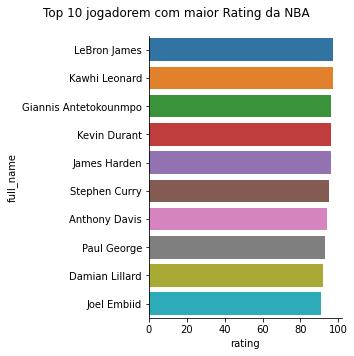

In [12]:
g = sns.catplot(x='rating', y='full_name', data=top_10_rating, kind='bar')
g.fig.suptitle('Top 10 jogadorem com maior Rating da NBA')
plt.subplots_adjust(top=0.9)
plt.show()

O fato dos jogadores terem um rantig muito parecido, com muita pouca diferença, torna o grafico algo irrelevante para essa analise, dessa maneira, seria mais ideal olhar os dados agrupando os valores

In [13]:
top_10_rating[['full_name', 'rating']]

,full_name,rating
0,LeBron James,97
1,Kawhi Leonard,97
2,Giannis Antetokounmpo,96
3,Kevin Durant,96
4,James Harden,96
5,Stephen Curry,95
6,Anthony Davis,94
7,Paul George,93
8,Damian Lillard,92
9,Joel Embiid,91


Podemos ver agora, de uma maneira mais limpa, quem sao os 10 melhores jogadores da NBA, temos Lebron James como o melhor, e Kawhi Leonard em segundo, mas podemos notar que temos o rating do top 1 ao top 4 com o rating semelhante, podemos deduzir algumas coisas, como por exemplo, o salario, sera que o salario sera um diferencial, pra considerar um jogador com o mesmo rating, como um melhor que o outro, ou talvez apenas a quantidade de titulos ganho na liga oficial.

Agora que sabemos quais sao os melhores jogadores da liga, vamos ver quais sao os piores

In [14]:
top_10_piores_ratings = df.sort_values(by='rating', ascending=True).head(10)
top_10_piores_ratings

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
428,Duncan Robinson,67,#55,Miami Heat,F,04/22/94,6-7 / 2.01,215 lbs. / 97.5 kg.,$1416852,USA,2018,Undrafted,Undrafted,Michigan,NBA2k20
421,Isaac Bonga,68,#17,Washington Wizards,G,11/08/99,6-8 / 2.03,200 lbs. / 90.7 kg.,$1416852,Germany,2018,2,39,NaN,NBA2k20
422,Isaiah Hartenstein,68,#0,NaN,F-C,05/05/98,7-0 / 2.13,250 lbs. / 113.4 kg.,$1416852,Germany,2017,2,43,NaN,NBA2k20
423,Jordan McRae,68,#0,Detroit Pistons,G,03/28/91,6-5 / 1.96,179 lbs. / 81.2 kg.,$1254933,USA,2014,2,58,Tennessee,NBA2k20
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,NaN,NBA2k20
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida,NBA2k20
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton,NBA2k20
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,NBA2k20
411,Devonte Graham,69,#0,Charlotte Hornets,G,02/22/95,6-1 / 1.85,185 lbs. / 83.9 kg.,$1416852,USA,2018,2,34,Kansas,NBA2k20
412,Amile Jefferson,69,#0,NaN,F-C,05/07/93,6-9 / 2.06,224 lbs. / 101.6 kg.,$1529007,USA,2017,Undrafted,Undrafted,Duke,NBA2k20


In [15]:
top_10_piores_ratings[['full_name', 'rating']]

,full_name,rating
428,Duncan Robinson,67
421,Isaac Bonga,68
422,Isaiah Hartenstein,68
423,Jordan McRae,68
427,Jalen Lecque,68
425,Michael Frazier,68
426,Kostas Antetokounmpo,68
424,Brandon Goodwin,68
411,Devonte Graham,69
412,Amile Jefferson,69


Podemos ver agora quem sao os jogadores com o pior rating da NBA, tendo Duncan Robinson com o menor, com apenas 67

In [16]:
qtd_player_team = df.team.value_counts()	
print("QTD de times",len(qtd_player_team))
print()
print(qtd_player_team)

QTD de times 30

Milwaukee Bucks           17
Phoenix Suns              16
New Orleans Pelicans      15
Dallas Mavericks          15
Orlando Magic             15
Los Angeles Lakers        15
Chicago Bulls             15
New York Knicks           15
Indiana Pacers            15
Boston Celtics            14
Sacramento Kings          14
San Antonio Spurs         14
Brooklyn Nets             14
Los Angeles Clippers      14
Detroit Pistons           14
Philadelphia 76ers        14
Minnesota Timberwolves    13
Washington Wizards        13
Toronto Raptors           13
Denver Nuggets            13
Memphis Grizzlies         13
Houston Rockets           13
Oklahoma City Thunder     13
Cleveland Cavaliers       12
Miami Heat                12
Utah Jazz                 12
Portland Trail Blazers    12
Atlanta Hawks             12
Charlotte Hornets         10
Golden State Warriors      9
Name: team, dtype: int64


agora que vimos algumas informaçoes como os jogadores e os times, podemos ver agora qual equipe tem a melhor media de rating de jogadores da NBA!!

Temos ao todo 30 equipes no NBA2K, com o time do Milwaukee Bucks, com a equipe com mais jogadores e o Golden State Warriors com a menor quantidade de jogadores

Podemos ver esses dados de forma visual, utilizando um grafico de barras

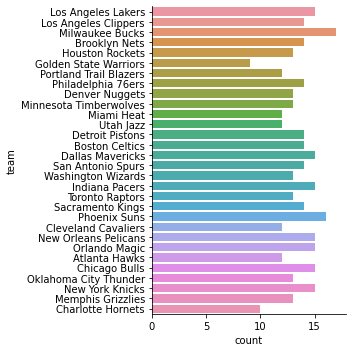

In [17]:
g = sns.catplot(y='team', data=df, kind='count')
plt.show()

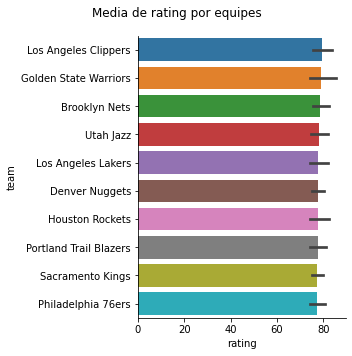

In [18]:
plot_order = df.groupby('team')['rating'].mean().sort_values(ascending=False).index.values
g = sns.catplot(x='rating', y='team', data=df, kind='bar', order=plot_order[:10])
g.fig.suptitle('Media de rating por equipes')
plt.subplots_adjust(top=0.9)
plt.show()

In [19]:
df.groupby('team', sort=False)['rating'].agg(['mean', 'max', 'min'])

,mean,max,min
team,,,
Los Angeles Lakers,77.800000,97,68
Los Angeles Clippers,79.285714,97,69
Milwaukee Bucks,76.411765,96,69
Brooklyn Nets,78.714286,96,71
Houston Rockets,77.692308,96,68
Golden State Warriors,79.111111,95,70
Portland Trail Blazers,77.500000,92,70
Philadelphia 76ers,77.285714,91,71
Denver Nuggets,77.769231,90,70


Apos agruparmos nossos dados podemos ver de uma forma melhor, que o time do Los Angeles Clippers, tem a maior media de rating dos jogadores, com 79.2, em seguida do Golden State Warrior

In [20]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [21]:
df['b_day'] = pd.to_datetime(df['b_day'])

Mudei para o formato datetime

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    object        
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    object        
 7   weight       429 non-null    object        
 8   salary       429 non-null    object        
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      363 non-null    object        
 14  version      429 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(12)
memory usage: 

Posso ver que a coluna salario que deveria ser no formato numerico, esta como string, isso se deve ao fato de a coluna e seus dados começarem com '$', para isso tem que ser removido

In [23]:
df['salary'] = df['salary'].str.replace('$', '')

In [24]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,Arizona State,NBA2k20


In [25]:
df.salary = df['salary'].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    object        
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    object        
 7   weight       429 non-null    object        
 8   salary       429 non-null    float64       
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      363 non-null    object        
 14  version      429 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(11)
me

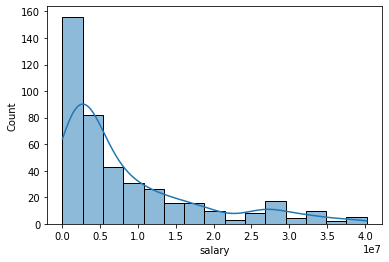

In [27]:
sns.histplot(data=df, x="salary", bins=15, kde=True)

Podemos ver a distribuiçao dos salarios dos jogadores da NBA 2K, sendo que a sua grande maioria esta concetrada no começo do nosso histograma, que possui uma calda pra direita

In [28]:
df.salary.describe()

count    4.290000e+02
mean     8.530080e+06
std      9.218059e+06
min      5.000000e+04
25%      2.000000e+06
50%      4.380120e+06
75%      1.220000e+07
max      4.023176e+07
Name: salary, dtype: float64

In [29]:
top_salario_player = df.sort_values(by='salary', ascending=False).head(10)
top_salario_player

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
5,Stephen Curry,95,#30,Golden State Warriors,G,1988-03-14,6-3 / 1.91,185 lbs. / 83.9 kg.,40231758.0,USA,2009,1,7,Davidson,NBA2k20
48,Chris Paul,85,#3,Oklahoma City Thunder,G,1985-05-06,6-1 / 1.85,175 lbs. / 79.4 kg.,38506482.0,USA,2005,1,4,Wake Forest,NBA2k20
12,Russell Westbrook,90,#0,Houston Rockets,G,1988-11-12,6-3 / 1.91,190 lbs. / 86.2 kg.,38506482.0,USA,2008,1,4,UCLA,NBA2k20
38,John Wall,86,#2,Washington Wizards,G,1990-09-06,6-4 / 1.93,195 lbs. / 88.5 kg.,38199000.0,USA,2010,1,1,Kentucky,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20
17,Blake Griffin,88,#23,Detroit Pistons,F,1989-03-16,6-9 / 2.06,252 lbs. / 114.3 kg.,34449964.0,USA,2009,1,1,Oklahoma,NBA2k20
46,Kyle Lowry,85,#7,Toronto Raptors,G,1986-03-25,6-0 / 1.83,205 lbs. / 93 kg.,33296296.0,USA,2006,1,24,Villanova,NBA2k20
7,Paul George,93,#13,Los Angeles Clippers,F,1990-05-02,6-8 / 2.03,210 lbs. / 95.3 kg.,33005556.0,USA,2010,1,10,Fresno State,NBA2k20


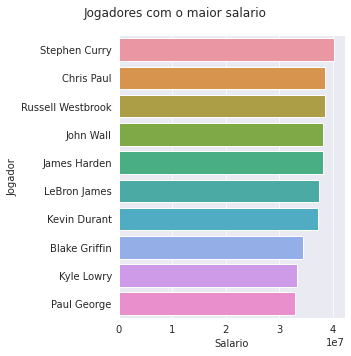

In [30]:
sns.set_palette('PRGn')
sns.set_style('darkgrid')

g = sns.catplot(x='salary', y='full_name', data=top_salario_player, kind='bar')
g.fig.suptitle('Jogadores com o maior salario')
g.set_xlabels('Salario')
g.set_ylabels('Jogador')
plt.subplots_adjust(top=0.9)
plt.show()

Podemos ver que Sthepen Curry e o jogador que recebe o maior salario da nba

In [31]:
top_salario_player.groupby(['full_name', 'salary', 'rating'], sort=False)['rating'].agg('mean')

full_name          salary      rating
Stephen Curry      40231758.0  95        95
Chris Paul         38506482.0  85        85
Russell Westbrook  38506482.0  90        90
John Wall          38199000.0  86        86
James Harden       38199000.0  96        96
LeBron James       37436858.0  97        97
Kevin Durant       37199000.0  96        96
Blake Griffin      34449964.0  88        88
Kyle Lowry         33296296.0  85        85
Paul George        33005556.0  93        93
Name: rating, dtype: int64

Podemos ver que apesar de alguns jogadores terem um rating menor, recebem um salario maior

In [32]:
from datetime import datetime
from datetime import date

df = pd.DataFrame(data=df)

def calculate_age(born):
    born : datetime.strptime(born, "%d.%m.%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['b_day'].apply(calculate_age)
print(df)

                 full_name  rating jersey  ...             college  version age
0             LeBron James      97    #23  ...                 NaN  NBA2k20  37
1            Kawhi Leonard      97     #2  ...     San Diego State  NBA2k20  30
2    Giannis Antetokounmpo      96    #34  ...                 NaN  NBA2k20  27
3             Kevin Durant      96     #7  ...               Texas  NBA2k20  33
4             James Harden      96    #13  ...       Arizona State  NBA2k20  32
..                     ...     ...    ...  ...                 ...      ...  ..
424        Brandon Goodwin      68     #0  ...  Florida Gulf Coast  NBA2k20  26
425        Michael Frazier      68    #21  ...             Florida  NBA2k20  27
426   Kostas Antetokounmpo      68    #37  ...              Dayton  NBA2k20  24
427           Jalen Lecque      68     #0  ...                 NaN  NBA2k20  21
428        Duncan Robinson      67    #55  ...            Michigan  NBA2k20  27

[429 rows x 16 columns]


In [33]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32


Com algumas linhas de codigo, tranformamos a coluna da data de nascimento em uma coluna com a idade dos jogadores, dessa forma ela e mais util para nos

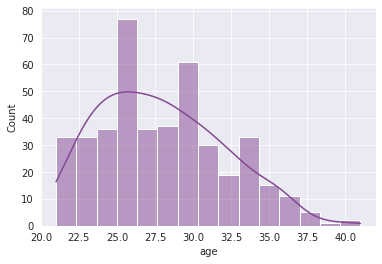

In [34]:
sns.histplot(data=df, x="age", bins=15, kde=True)

Podemos ver a distribuiçao da idade dos jogadores da NBA, a menor idade aparentado ser algo em torno de 21 anos e o jogador mais velho tendo 40.

In [35]:
df['position'].value_counts()

G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

E possivel ver que a grande maioria dos jogadores atuam nas posiçoes G e F
e tambem notamos que existe duas variaçoes desas posiçoes, como G-F, F-G, muito provavelmente os jogadores atuam em duas posiçoes diferentes, porem tem mais foco em uma delas, no caso F ou G

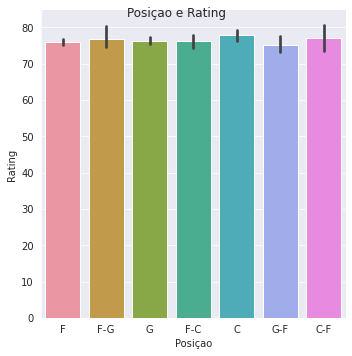

In [36]:
g = sns.catplot(x='position', y = 'rating', kind='bar', data=df)
g.set_xlabels('Posiçao')
g.set_ylabels('Rating')
g.fig.suptitle('Posiçao e Rating')
plt.show()

Com o grafico de barras podemos ver que o rating por posiçao, em todas as posiçoes sao muito parecidas e muito proximas, ou seja, nao a nenhuma posiçao que consinga jogadores com o rating superior a outras.

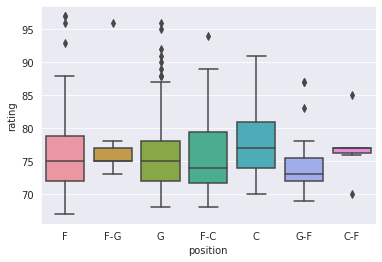

In [37]:
ax = sns.boxplot(x="position", y="rating", data=df)
plt.show()

Com esse boxplot, temos uma visao melhor dos nossos dados, nesse caso, temos diversas outlyers, podemos notar que a maioria delas sao outlyers superiores, porem notamos que na posiçao C-F, tem uma outlyer inferios, um valor muito inferior ao intevalo interquartil(IQR)

Tambem podemos notar que a mediana de todos os valores sao muito proximas, e a posiçao onde tem uma mediana um pouco maior, notamos que nao ha outlyers

In [38]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32


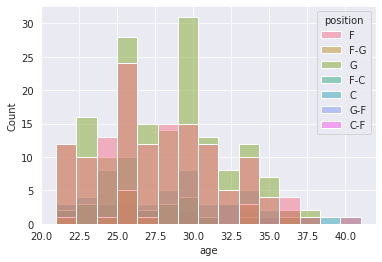

In [39]:
sns.histplot(data=df, x="age", bins=15, hue='position')

Algo interesante que podemos notar nos aprofudando vendo a idade dos jogadores, e que o apice dos nossos dados sao os 30 anos, e nos 30 anos e onde ha maior numero de jogadores que atuam na posiçao G, podemos notar que a maioria dos jogadores por idade, sao nas posiçoes F-G, dessa maneira podemos pensar em algumas coisas.

A medida que o tempo passa, os jogadores vao ganhando mais experiencia, vao ganhado mais consecimento, mais taticas, e quando chegam aos 30 anos, atuam mais como G, pois ja tem mais desenvoltura, pois os 30 anos na maioria das vezes e o apice dos atletas, onde o corpo e mais forte, entao eles param de atuar em duas posiçoes, e aqueles que se destacam mais, atuam em G.

Vemos que a maioria dos jogadores atuam nessas duas posiçoes G-F, e temos muito poucos que atuam em outras, muito provavelmente se da ao fato de serem jogadores com um rating mais baixo, ou um com uma qualidade diferente, pra uma posiçao diferente.

Outra coisa que se pode notar, depois dos 30 anos, e que o numero de jogadores que atuam em duas posiçoes caiu muito, ou seja, eles começam a atuar somente em uma posiçao, com foco em uma funçao, mas nao e inexistente o numero, porem podemos ver que a partir dos 37 aparentemente e inexistente um jogador que atuem em duas funçoes.

In [40]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32


In [41]:
df['height_new'] = df['height'].str.split('/').str[1]

In [42]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96


In [43]:
df['weight_new'] = df['weight'].str.split('/').str[1]

In [44]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06,113.4 kg.
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01,102.1 kg.
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11,109.8 kg.
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08,104.3 kg.
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96,99.8 kg.


In [45]:
remove_kg = 'kg.'
df['weight_new'] = df['weight_new'].str.replace(remove_kg, '')

In [46]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96,99.8


In [47]:
df = df.astype({"height_new":'float', 'weight_new' : 'float'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    object        
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    object        
 7   weight       429 non-null    object        
 8   salary       429 non-null    float64       
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      363 non-null    object        
 14  version      429 non-null    object        
 15  age          429 non-null    int64         
 16  height_n

Agora que criamos duas colunas height_new, weight_new, baseadas nas colunas de height e weight, delas peguei os dados dos padroes que usamos no brasil, no caso, a altura em metros, e o peso em KG, para analisar

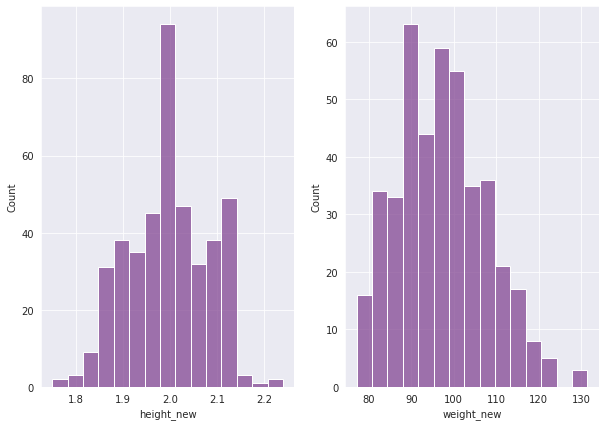

In [49]:
fig, ax =plt.subplots(1,2,figsize=(10,7))
sns.histplot(data=df, x="height_new", bins=15, ax=ax[0])
sns.histplot(data=df, x="weight_new", bins=15, ax=ax[1])
fig.show()

Agora podemos observar, que a grande maioria dos jogadores tem 2 metros, e se tratando de peso, a grande maioria pensa entre 90 a 100 kg

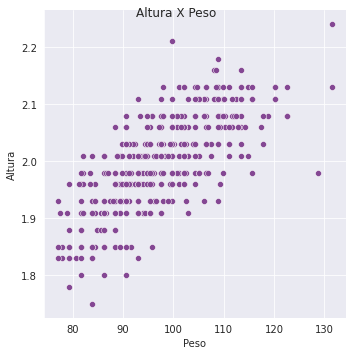

In [50]:
g = sns.relplot(data=df, x="weight_new", y="height_new")
g.fig.suptitle('Altura X Peso')
g.set(xlabel='Peso', ylabel='Altura')
plt.show()

Podemos ver agora a relaçao entre as duas variaveis, conforme a altura aumenta, o peso tambem aumenta

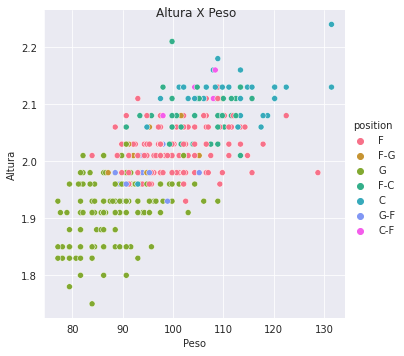

In [51]:
g = sns.relplot(data=df, x="weight_new", y="height_new", hue='position')
g.fig.suptitle('Altura X Peso')
g.set(xlabel='Peso', ylabel='Altura')
plt.show()

Agora adicionando uma terceira camada na nossa analise, a posiçao dos jogadores, podemos notar algo interessante, os jogadores que sao mais "leves", e 'menores', jogam na posiçao G, vemos q isso e um padrao, e no extremo disso, temos os jogadores, mais altos e mais pesados, que jogam em sua maioria na posiçao C, e podemos notar algo interessante, que os mesmos jogadores que jogam nessa posiçao, sao os jogadores mais velhos e experientes, ou seja, devem jogar em uma posiçao onde ajeita os time na quadra, e arma a defesa, para um contra ataque mais rapido, e podemos pensar dessa forma pois os jogadores mais novos, e mais leves, e de aproximadamente 30 anos (pois vimos la em cima no histograma), que esses jogadores sao maioria, entao sao mais rapidos, por essa questao eles jogam mais a frente, e com foco em contra ataque, e um ataque rapido.

E tambem tem os jogadores que tem entre 1.95 de altura e 90 kg que jogam com o foco na posiçao F.

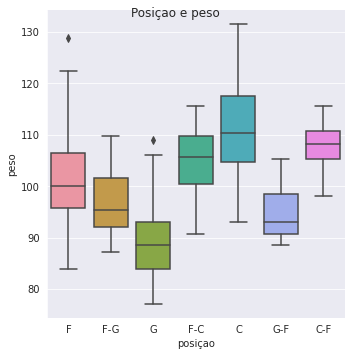

In [52]:
g = sns.catplot(data=df, x = 'position', y = 'weight_new', kind='box')
g.fig.suptitle('Posiçao e peso')
g.set(xlabel='posiçao', ylabel='peso')
plt.show()

podemos observar bem com esse boxplot que realmente a posiçao C e onde os jogadores sao mais pesados, tanto que sua mediana e maior que 110, e notamos que jogadores da posiçao F tem como mediana 100, e que possui uma outlyer muito alta, de quase 130, ou seja ha um jogador que atua nessa posiçao, que para os padroes da posiçao, esta muito fora da curva

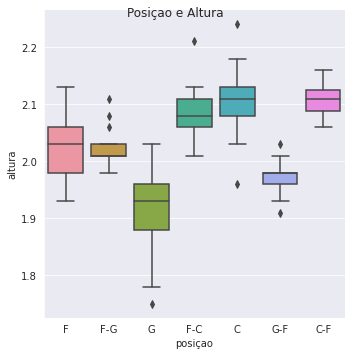

In [53]:
g = sns.catplot(data=df, x = 'position', y = 'height_new', kind='box')
g.fig.suptitle('Posiçao e Altura')
g.set(xlabel='posiçao', ylabel='altura')
plt.show()

Podemos notar que temos diversar outlyers relacionadas a altura por posiçao, podemos ver que na posiçao F onde havia uma outlyer por peso, nao ha por altura, onde havia um jogador com um peso muito maior aqui nao ha, lembrando que ha uma relaçao muito grande de peso com altura, talvez esse jogador tenha uma altura menor, e seu peso um pouco maior, e dessa maneira tem uma vantagem tecnica para o time.

Mas notamos que ate mesmo na posiçao C onde os jogadores maiores e mais pesados atuam, ha duas outlyers de altura, ha entao um jogador muito alto, muito acima dos padroes da posiçao, e um muito abaixo, o que podemos pensar e que talvez essas caracteriscas desses jogadores possam ser por uma questao tecnica, para a posiçao, para atuar, ja que por peso nao ha um problema.

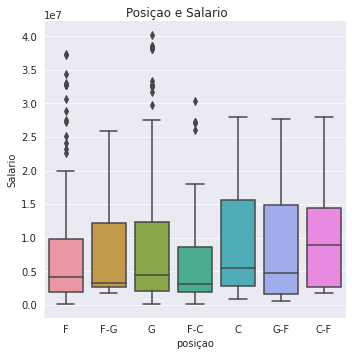

In [54]:
g = sns.catplot(data=df, x = 'position', y = 'salary', kind='box')
g.fig.suptitle('Posiçao e Salario')
g.set(xlabel='posiçao', ylabel='Salario')
plt.show()

Agora se tratando por salario, e por posiçao, vemos que jogadores da posiçao C tem o maior intervalor interquartil superior, e algo interessante de se notar, sabendo que os jogadores dessa posiçao sao em sua maioria um pouco mais velhos, do que os demais, mas tambem os mesmo sao maiores e mais pesados, porem eles seguem um certo padrao, no qual a maioria esta recebendo um salario "parecido", e notamos isso pois nao outlyers, talvez os jogadores que recebam mais jogando nessa posiçao tenham um rating maior, mas iremos checar se essa hipotese em breve.

Vemos que as posiçoes de F, G tem diversas outlyer, e novamente me faz acreditar que o rating deve interferir muito no salario dos jogadores.

In [55]:
df.position.value_counts()

G      169
F      138
C       48
F-C     36
G-F     19
F-G     13
C-F      6
Name: position, dtype: int64

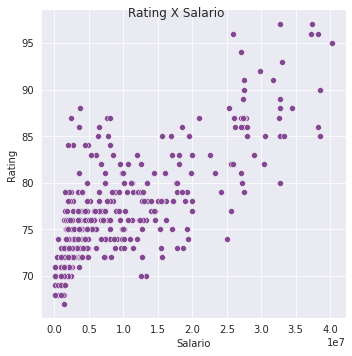

In [56]:
g = sns.relplot(data=df, x="salary", y="rating")
g.fig.suptitle('Rating X Salario')
g.set(xlabel='Salario', ylabel='Rating')
plt.show()

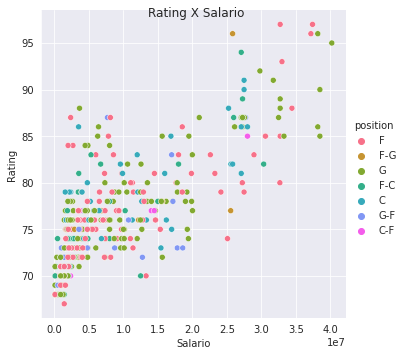

In [57]:
g = sns.relplot(data=df, x="salary", y="rating", hue='position')
g.fig.suptitle('Rating X Salario')
g.set(xlabel='Salario', ylabel='Rating')
plt.show()

Ai esta vemos que a hipotese estava certa, quanto maior o rating do jogador, maior e seu salario, vemos que a uma grande concentraçao de valores abaixo de 80, onde a maioria dos jogadores estao, e recebem um salario de de ate 2.0, em sua grande maioria.

Vemos la em cima que jogadores das posiçoes F e G, com um rating maior de 90, recebem os maiores salarios, e que vemos os jogadores da posiçao C que recebem um salario parecido.


Entao pudemos constatar que quanto maior o rating de um jogador, maior seu salario, mas jogando nas posiçoes como F, G ou C, seu salario e muito maior do que a maioria

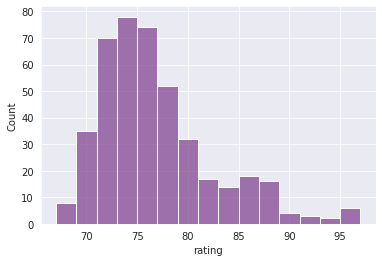

In [58]:
sns.histplot(data=df, x='rating', bins=15)

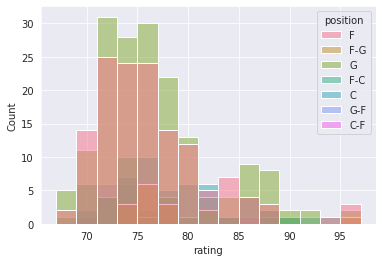

In [59]:
sns.histplot(data=df, x='rating', bins=15, hue='position')

Vemos que a grande maioria dos jogadores tem um rating entre 73 - 78, essa grande maioria atua como F-G, sendo esses jogadores os mais novos da NBA, ainda se desenvolvendo e ganhando experiencia.

Tambem bemos que os jogadores a pardir de 85 de rating sao muito escassos, sao poucos, e em sua marioria sao das posicoes, F, G e C, isso explica os jogadores que recebem os maiores salarios da NBA, e suas respectivas posiçoes, eles sao escassos, sao poucos e atuam em posicoes onde ha muitos jogadores, medianos, dessa maneira eles eles se destacam, ganham mais, e tem uma avaliaçao muito maior do que os mesmos que atuam na sua posiçao

In [60]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96,99.8


In [61]:
df['country'].value_counts()

USA                                 323
Canada                               15
Australia                             9
France                                8
Spain                                 6
Germany                               6
Croatia                               6
Serbia                                5
Italy                                 4
Turkey                                4
Greece                                3
Latvia                                3
Nigeria                               3
Lithuania                             2
Bosnia and Herzegovina                2
Ukraine                               2
The Bahamas                           2
Cameroon                              2
Democratic Republic of the Congo      2
Brazil                                2
Slovenia                              2
Angola                                1
Philippines                           1
Haiti                                 1
New Zealand                           1


Podemos ver que praticamente todos os jogadores que atuam na NBA, sao dos EUA, alguns do canada e da australia

In [62]:
print('Grupo por pais e media de rating, valor maximo e valor minimo')
df.groupby('country', sort=False)['rating'].agg(['mean', 'max', 'min'])

Grupo por pais e media de rating, valor maximo e valor minimo


,mean,max,min
country,,,
USA,76.241486,97,67
Greece,78.000000,96,68
Cameroon,89.000000,91,87
Australia,77.444444,91,72
Serbia,78.200000,90,71
France,75.750000,88,71
Slovenia,83.000000,87,79
Latvia,79.333333,87,75
Montenegro,86.000000,86,86


Podemos notar que a media de rating dos EUA, e bem baixa, de aproximadamente de 76, e que nos lembra que a grande distribuiçao dos nossos dados a grande parte do rating era entre 73 e 78, e nos estados unidos e onde tem o maior valor de rating.

In [63]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96,99.8


In [64]:
df.college.value_counts()

Kentucky           26
Duke               24
North Carolina     13
UCLA               12
Kansas             11
                   ..
San Diego State     1
West Virginia       1
Louisiana           1
Missouri State      1
Illinois            1
Name: college, Length: 109, dtype: int64

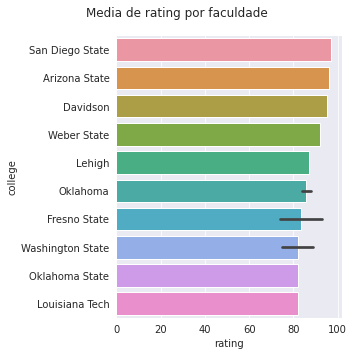

In [65]:
plot_order = df.groupby('college')['rating'].mean().sort_values(ascending=False).index.values
g = sns.catplot(x='rating', y='college', data=df, kind='bar', order=plot_order[:10])
g.fig.suptitle('Media de rating por faculdade')
plt.subplots_adjust(top=0.9)
plt.show()

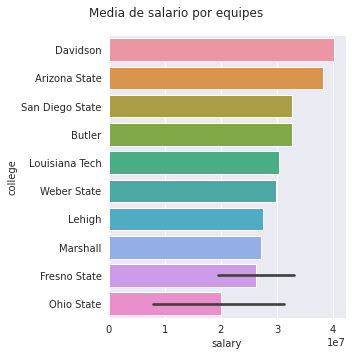

In [66]:
plot_order = df.groupby('college')['salary'].mean().sort_values(ascending=False).index.values
g = sns.catplot(x='salary', y='college', data=df, kind='bar', order=plot_order[:10])
g.fig.suptitle('Media de salario por equipes')
plt.subplots_adjust(top=0.9)
plt.show()

Podemos ver agora que o colegio de san diego, e onde ha maior media de rating dos jogadores, entao podemos acreditar que muitos bons jogadores vem dessa universidade, e a universidade do Arizona, e a universidade de Davidson.
e no grafico de media de salario, podemos ver que novamente essas tres universidades aparecem, com as maiores medias salariais, dentro da NBA, podemos entao acreditar que essas faculdades e onde estao futuros grandes jogadores.

In [67]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,NBA2k20,37,2.06,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,30,2.01,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,NBA2k20,27,2.11,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,NBA2k20,33,2.08,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,32,1.96,99.8


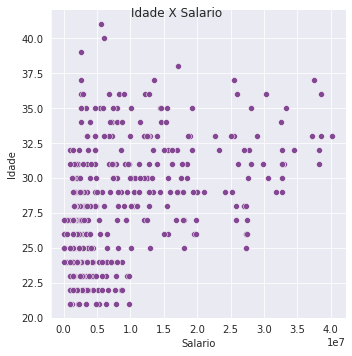

In [68]:
g = sns.relplot(data=df, x="salary", y="age")
g.fig.suptitle('Idade X Salario')
g.set(xlabel='Salario', ylabel='Idade')
plt.show()

Podemos observar que conforme a idade de jogadores aumenta, e vao ganhando experiencia, seus salarios aumentam porem podemos observar que com uma idade maior, o salario diminui.

In [69]:
sem_times = df[df['team'].isna()]
sem_times

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age,height_new,weight_new
33,DeMarcus Cousins,86,#0,NaN,C,1990-08-13,6-10 / 2.08,270 lbs. / 122.5 kg.,3500000.0,USA,2010,1,5,Kentucky,NBA2k20,31,2.08,122.5
168,Michael Beasley,76,#0,NaN,F,1989-01-09,6-10 / 2.08,235 lbs. / 106.6 kg.,3500000.0,USA,2008,1,2,Kansas State,NBA2k20,33,2.08,106.6
177,Gerald Green,76,#0,NaN,F-G,1986-01-26,6-6 / 1.98,192 lbs. / 87.1 kg.,2564753.0,USA,2005,1,18,NaN,NBA2k20,36,1.98,87.1
198,Isaiah Thomas,76,#0,NaN,G,1989-02-07,5-9 / 1.75,185 lbs. / 83.9 kg.,2320044.0,USA,2011,2,60,Washington,NBA2k20,32,1.75,83.9
203,Pau Gasol,75,#0,NaN,C,1980-07-06,7-1 / 2.16,250 lbs. / 113.4 kg.,5538540.0,Spain,2001,1,3,NaN,NBA2k20,41,2.16,113.4
237,Allonzo Trier,75,#0,NaN,G-F,1996-01-17,6-4 / 1.93,200 lbs. / 90.7 kg.,3551100.0,USA,2018,Undrafted,Undrafted,Arizona,NBA2k20,26,1.93,90.7
264,Chandler Parsons,74,#0,NaN,F,1988-10-25,6-9 / 2.06,200 lbs. / 90.7 kg.,25102512.0,USA,2011,2,38,Florida,NBA2k20,33,2.06,90.7
266,Ivan Rabb,74,#0,NaN,F-C,1997-02-04,6-10 / 2.08,220 lbs. / 99.8 kg.,451326.0,USA,2017,2,35,California,NBA2k20,24,2.08,99.8
283,Allen Crabbe,73,#0,NaN,G-F,1992-04-09,6-5 / 1.96,197 lbs. / 89.4 kg.,17818456.0,USA,2013,2,31,California,NBA2k20,29,1.96,89.4
294,CJ Miles,73,#0,NaN,G-F,1987-03-18,6-6 / 1.98,232 lbs. / 105.2 kg.,8730158.0,USA,2005,2,34,NaN,NBA2k20,34,1.98,105.2


In [70]:
sem_times.shape

(23, 18)

vemos que sao 23 jogadores que estao sem times

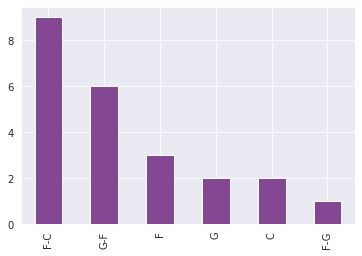

In [71]:
sem_times.position.value_counts().plot(kind='bar')

Podemos observar que a grande maioria dos jogadores que estao sem times, atuam em na posiçao de F-C